In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#download data from sklearn
from sklearn.datasets import load_iris
data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

In [5]:
#merge petal and sepal data with target data
df = pd.concat([df_data,df_target], axis = 1, sort = False)

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


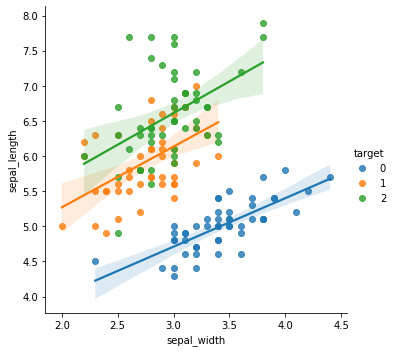

In [7]:
sns.lmplot(x='sepal_width', y='sepal_length',hue='target', data = df)

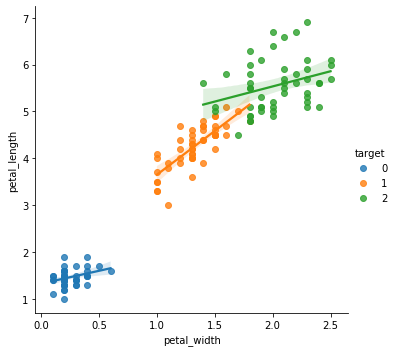

In [8]:
sns.lmplot(x='petal_width', y='petal_length', hue='target',data = df)

In [11]:
X = data
y = target

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
y_pred = knn.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9666666666666667

In [17]:
freq_table = {
    'Correct':0,
    'Wrong':0
}

for x,y in zip(y_test,y_pred):
    if x == y:
        freq_table['Correct'] += 1
    else:
        freq_table['Wrong'] +=1
print(freq_table)

{'Correct': 29, 'Wrong': 1}


In [18]:
k = [1,3,5,7,10,20,30,40,50]

In [19]:
import statistics as st

avg_acc = []
avg_cor = []

for value in k:
    acc_score = []
    correct_count = []
    for i in range(10):
        X = data
        y = target
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
        knn = KNeighborsClassifier(n_neighbors = value)
        knn.fit(X_train,y_train)
        
        y_pred = knn.predict(X_test)
        acc_score.append(accuracy_score(y_test,y_pred))
        count = 0
        for x,y in zip(y_test,y_pred):
            if x == y:
                count += 1
        correct_count.append(count)
        
    avg_acc.append(st.mean(acc_score))
    avg_cor.append(st.mean(correct_count))

In [20]:
avg_acc

[0.9566666666666667,
 0.95,
 0.97,
 0.9566666666666667,
 0.9633333333333334,
 0.93,
 0.9633333333333334,
 0.92,
 0.8966666666666667]

In [21]:
avg_cor

[28.7, 28.5, 29.1, 28.7, 28.9, 27.9, 28.9, 27.6, 26.9]

[Text(0, 0.5, 'Accuracy Scores'), Text(0.5, 0, 'K Values')]

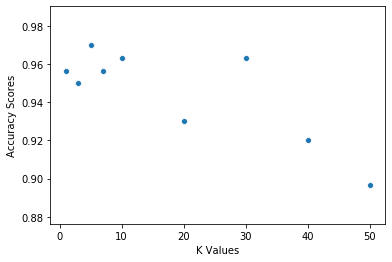

In [22]:
graph = sns.scatterplot(x = k, y = avg_acc)
graph.set(xlabel='K Values', ylabel='Accuracy Scores')